In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from onix.units import ureg

In [5]:
specific_heat = 1e-2 * ureg.J/(ureg.kg*ureg.K)
thermal_conductivity = 5 * ureg.W/(ureg.cm*ureg.K)
density = 3.98 * ureg.g/(ureg.cm**3)

diffusivity = thermal_conductivity/(density*specific_heat)

In [7]:
diffusivity.to_base_units()

12.56281407035176 <Unit('meter ** 2 / second')>

ix [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34.]
iy [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19.]
iz [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29.]


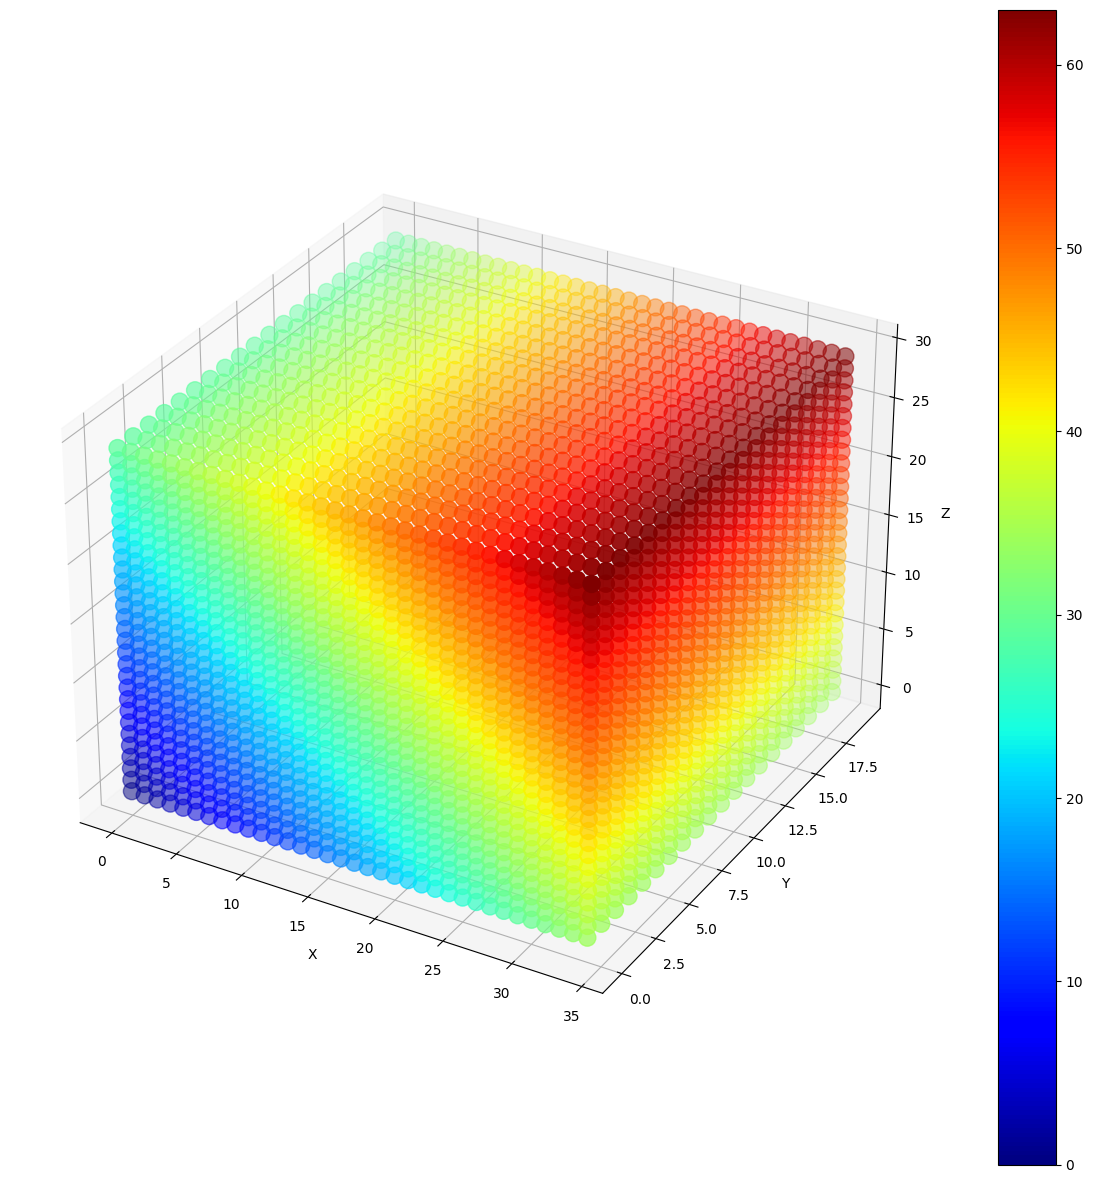

In [8]:
def get_grid(mx, my, mz, Lx,Ly,Lz):
    ix, iy, iz = Lx*np.linspace(0,1,mx), Ly*np.linspace(0,1,my), Lz*np.linspace(0,1,mz)
    x, y, z = np.meshgrid(ix,iy,iz, indexing='ij')
    print('ix', ix), print('iy', iy), print('iz', iz)
    return x,y,z

def plot_grid(x,y,z,T):
    def plot_boundary_only(x,y,z,T):
        mx, my, mz = x.shape
        x[1:-1, 1:-1, 1:-1],y[1:-1, 1:-1, 1:-1],z[1:-1, 1:-1, 1:-1],T[1:-1, 1:-1, 1:-1] = np.nan, np.nan, np.nan, np.nan     # remove interior
        x[1:-1, 1:,0], y[1:-1, 1:,0], z[1:-1, 1:,0],  T[1:-1, 1:,0] = np.nan, np.nan, np.nan, np.nan                         # remove bottom
        x[1:-1, my-1, 1:-1], y[1:-1, my-1, 1:-1], z[1:-1, my-1, 1:-1], T[1:-1, my-1, 1:-1] = np.nan, np.nan, np.nan, np.nan  # remove north face
        x[0, 1:, :-1], y[0, 1:, :-1], z[0, 1:, :-1], T[0, 1:, :-1] = np.nan, np.nan, np.nan, np.nan                          # remove west face
        return x,y,z,T
    
    x,y,z,T = plot_boundary_only(x,y,z,T)   
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111, projection='3d')
    img = ax.scatter(x,y,z, c=T.reshape(-1), s=150, cmap=plt.jet())
    fig.colorbar(img)
    
    #ax.zaxis.set_rotate_label(False) # To disable automatic label rotation
    ax.set_ylabel('Y')
    ax.set_xlabel('X', rotation=0)
    ax.set_zlabel('Z', rotation=0)
    plt.savefig("cube.png")
    plt.show()
    
def init_T(x,y,z):
    T = np.zeros_like(x)
    case = 'xz'
    if case == 'x': T = x
    if case == 'y': T = y
    if case == 'z': T = z
    if case == 'xz': T = x+z
    return T

nx, ny, nz = 35, 20, 30
Lx, Ly, Lz = nx-1, ny-1, nz-1
x,y,z = get_grid(nx, ny, nz, Lx,Ly,Lz)  # generate a grid with mesh size Δx = Δy = Δz = 1
T = init_T(x,y,z)
plot_grid(x,y,z,T)